<a href="https://colab.research.google.com/github/marce3-2140/Machine-Learning-Preprocessing/blob/main/TipoUva_ClassificationModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/fralfaro/CD-DS-Course/blob/main/docs/extra_project_template/template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Classification Type of Grape**

**Clasificacion del tipo de Uva basándose en sus características**


**Context**

1) Utilizar un modelo de regresión logística e intentar tanto la regularización L1 como L2. Esta es una gran oportunidad para mostrar que afinar los hiperparámetros puede afectar los resultados del modelo.

2) Después de hacer eso, intenter usar los modelos de KNN y bosque aleatorio.

3) Aborden estas preguntas en una celda de texto al final de sus códigos:

¿Cuál es el modelo que mejor funciona?
¿Cuáles hiperparámetros afinaron para cada uno de los modelos? ¿Hay algún modelo que les gustó más y por qué?

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# preprocesar
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# modelar
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# metricas
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
file = '/content/drive/MyDrive/CodingDojo/Cargas/Wine_cultivars.csv'
df = pd.read_csv(file)

In [39]:
df.head()

,Class label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavonid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [40]:
df.shape

(178, 14)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class label                   178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic Acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavonid phenols           178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [42]:
df.duplicated().sum()

0

In [43]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [44]:
df.isnull().sum().sum()

0

In [45]:
df.describe(include='all')

,Class label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavonid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## **Visualizaciones**

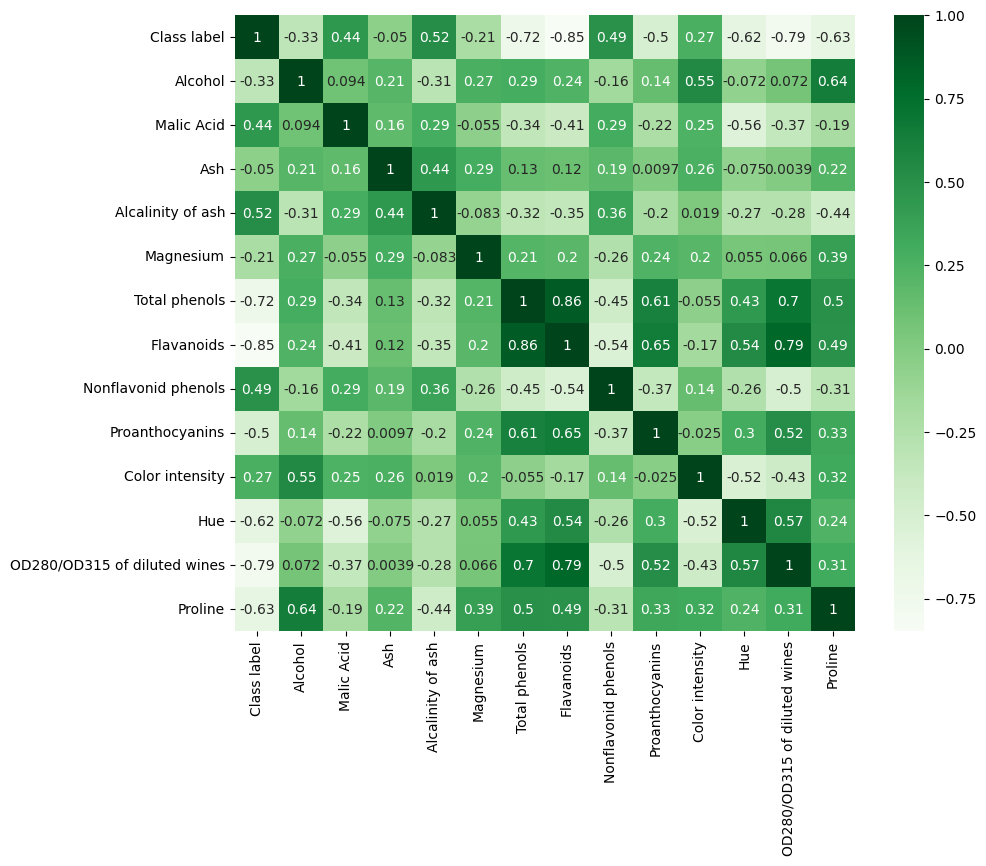

In [46]:
#correlaciones
corr = df.corr()
plt.figure(figsize=(10,8)) #Grafico Size
sns.heatmap(corr, cmap="Greens", annot=True); #Creamos el mapa de calor
plt.show();

<Axes: title={'center': 'Freecuencia de tipo de Uva'}>

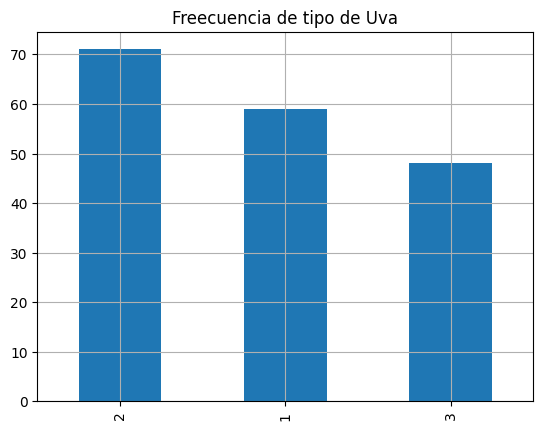

In [47]:
df['Class label'].value_counts().plot.bar(title='Freecuencia de tipo de Uva', grid=True)

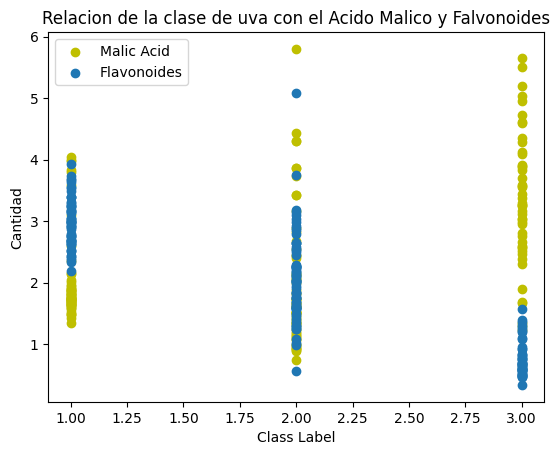

In [48]:
plt.scatter(df['Class label'], df['Malic Acid'], label="Malic Acid", color='y')
plt.scatter(df['Class label'], df['Flavanoids'], label='Flavonoides')
plt.legend()
plt.xlabel('Class Label')
plt.ylabel('Cantidad')
plt.title("Relacion de la clase de uva con el Acido Malico y Falvonoides")
plt.show()

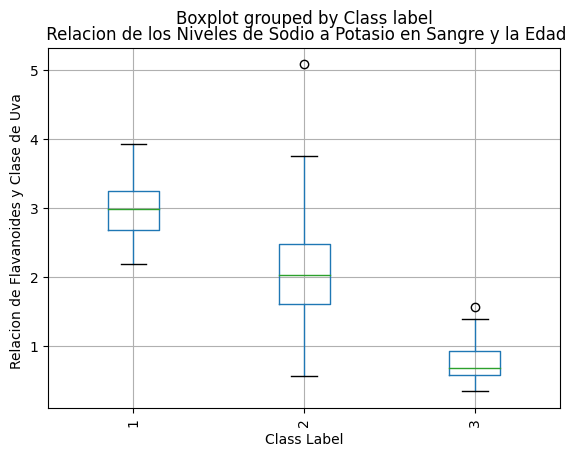

In [49]:
df.boxplot(column ='Flavanoids', by =  'Class label')
plt.title(' Relacion de los Niveles de Sodio a Potasio en Sangre y la Edad')
plt.xlabel("Class Label")
plt.ylabel("Relacion de Flavanoides y Clase de Uva ")
plt.xticks(rotation=90);

## **Dividimos el DataFrame**

In [50]:
# elegir las variables
X = df.drop(columns='Class label')
y = df['Class label']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

## **Preprocesamiento**

In [52]:
#Separamos columnas numericas y categoricas
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

#instanciar pipelines para imputar para datos numericos
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

#instanciar pipelines para imputar para datos categoricos
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

#transformar los datos
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [53]:
#entrenar con X_train y aplicar a X_train y X_test
preprocessor.fit(X_train)
X_train_processed=preprocessor.transform(X_train)
X_test_processed=preprocessor.transform(X_test)
X_val_processed = preprocessor.transform(X_val)

Acc test :0.9629629629629629
Acc test :0.9259259259259259
Acc test :0.9629629629629629
Acc test :0.9629629629629629


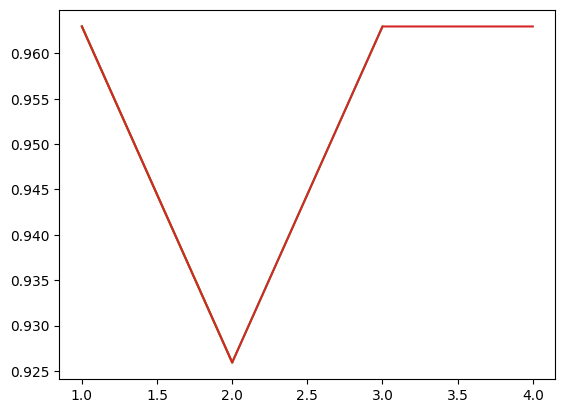

In [54]:
#Instanciamos y aplicamos KNN
acc=[]
vec=[]
for n in range(1,5):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_processed, y_train)
    print(f"Acc test :{knn.score(X_test_processed,y_test)}")
    acc.append(knn.score(X_test_processed,y_test))
    vec.append(n)
    y_pred=knn.predict(X_test_processed)

    plt.plot(vec,acc)

In [55]:
#Segunda instancia al modelo Knn
knn2 = KNeighborsClassifier(n_neighbors=1)
knn2.fit(X_train_processed, y_train)
y_pred2=knn.predict(X_test_processed)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           1       0.91      1.00      0.95        10
           2       1.00      0.91      0.95        11
           3       1.00      1.00      1.00         6

    accuracy                           0.96        27
   macro avg       0.97      0.97      0.97        27
weighted avg       0.97      0.96      0.96        27



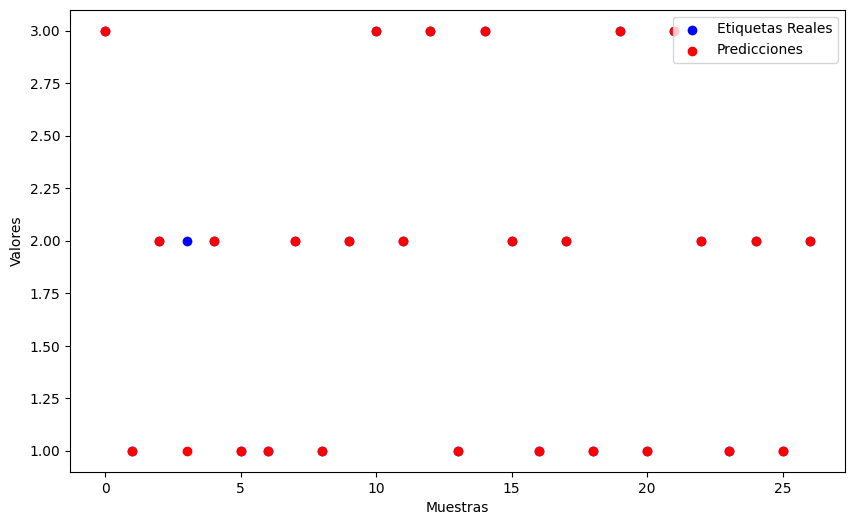

In [56]:
#Grafica Comparar las etiquetas reales con las predicciones
indices = np.arange(len(y_test))
plt.figure(figsize=(10,6))
plt.scatter(indices, y_test, color='blue', label='Etiquetas Reales')
plt.scatter(indices, y_pred2, color='red', label='Predicciones')
#plt.scatter(y_preed, color='red', label='predictions', marker='X')
plt.xlabel('Muestras')
plt.ylabel('Valores')
plt.legend()
plt.show()

In [61]:
# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'max_depth': [None, 5, 10, 15],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],  # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4]  # Mínimo de muestras en un nodo hoja
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train_processed, y_train)

# Obtener los resultados de la búsqueda en cuadrícula
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


              precision    recall  f1-score   support

           1       1.00      0.97      0.99        40
           2       0.98      1.00      0.99        50
           3       1.00      1.00      1.00        34

    accuracy                           0.99       124
   macro avg       0.99      0.99      0.99       124
weighted avg       0.99      0.99      0.99       124



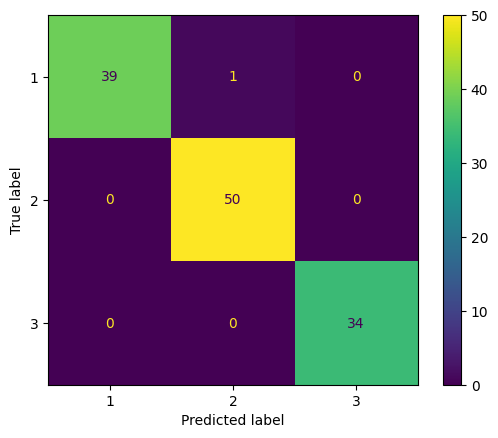

In [63]:
#Segunda instancia al modelo Knn
tree = DecisionTreeClassifier(max_depth= None, min_samples_leaf= 1, min_samples_split= 10)
tree.fit(X_train_processed, y_train)
y_predicho = tree.predict(X_train_processed)
# Clasification Report para LogisticRegressionClasifier
print(classification_report(y_train,y_predicho, zero_division=0))
ConfusionMatrixDisplay.from_predictions(y_train, y_predicho);

> Nota: En este caso el mejor modelo para este conjunto de datos es el modelo de DecisionTreeClasifier

> Nota: Se ajustaron los siguientes hiperparametros C=0.1 , class_weight='balanced',penalty='l2', solver='sag', multi_class='multinomial'